In [4]:
#import necessary packages

from bs4 import BeautifulSoup
import requests
import pandas as pd
import requests
import traceback
import re


In [5]:
url_list = ['https://d-scholarship.pitt.edu/view/year/1957.html', 
            'https://d-scholarship.pitt.edu/view/year/1955.html', 
            'https://d-scholarship.pitt.edu/view/year/1954.html', 
            'https://d-scholarship.pitt.edu/view/year/1953.html', 
            'https://d-scholarship.pitt.edu/view/year/1952.html', 
            'https://d-scholarship.pitt.edu/view/year/1951.html',  
            'https://d-scholarship.pitt.edu/view/year/1950.html', 
            'https://d-scholarship.pitt.edu/view/year/1949.html', 
            'https://d-scholarship.pitt.edu/view/year/1934.html', 
            'https://d-scholarship.pitt.edu/view/year/0202.html']  # add additonal object manually, if needed
for y in range(1959,2023):
    url = f"https://d-scholarship.pitt.edu/view/year/{y}.html"
    url_list.append(url)
    
    
url_list

['https://d-scholarship.pitt.edu/view/year/1957.html',
 'https://d-scholarship.pitt.edu/view/year/1955.html',
 'https://d-scholarship.pitt.edu/view/year/1954.html',
 'https://d-scholarship.pitt.edu/view/year/1953.html',
 'https://d-scholarship.pitt.edu/view/year/1952.html',
 'https://d-scholarship.pitt.edu/view/year/1951.html',
 'https://d-scholarship.pitt.edu/view/year/1950.html',
 'https://d-scholarship.pitt.edu/view/year/1949.html',
 'https://d-scholarship.pitt.edu/view/year/1934.html',
 'https://d-scholarship.pitt.edu/view/year/0202.html',
 'https://d-scholarship.pitt.edu/view/year/1959.html',
 'https://d-scholarship.pitt.edu/view/year/1960.html',
 'https://d-scholarship.pitt.edu/view/year/1961.html',
 'https://d-scholarship.pitt.edu/view/year/1962.html',
 'https://d-scholarship.pitt.edu/view/year/1963.html',
 'https://d-scholarship.pitt.edu/view/year/1964.html',
 'https://d-scholarship.pitt.edu/view/year/1965.html',
 'https://d-scholarship.pitt.edu/view/year/1966.html',
 'https://

In [6]:
# Scrape the data on web page

In [7]:
# Test usage

test = "https://d-scholarship.pitt.edu/view/year/2022.html"
test_r = requests.get(test)
test_source = test_r.content
test_soup = BeautifulSoup(test_source, 'html.parser')
test_class_people = test_soup.find(class_="ep_view_page ep_view_page_view_year").find_all('p')

test_yearly_list = []
for peo in test_class_people:
    test_element = peo.text
    test_split_result = [x.strip() for x in test_element.split("\n")]
    
    test_author = test_split_result[1]
    test_year = test_split_result[4]
    test_thesis = test_split_result[6]
    
    test_yearly_list.append([test_author, test_year, test_thesis])

test_sub_df = pd.DataFrame(columns=['Author', 'Year', 'Thesis'], data=test_yearly_list)




In [8]:
m_page = r"https://d-scholarship.pitt.edu/view/year/"
mr = requests.get(m_page)
msource = mr.content
msoup = BeautifulSoup(msource, 'html.parser')
year_list = msoup.find(class_='ep_view_menu').find_all('a')

year_list_str = []
for s in year_list:
    st = s.text
    year_list_str.append(st)

st

'Not Specified'

In [9]:
# Construct a empty dataframe


thesis_df = pd.DataFrame(columns=['Author', 'Year', 'Thesis'])

# Input the url 1 by 1 and get each source page and soup
for u in url_list:
    
    r = requests.get(u) 
    source = r.content
    soup = BeautifulSoup(source, 'html.parser')
    # Find the element we are looking for (2 levels finding method)
    class_people = soup.find(class_="ep_view_page ep_view_page_view_year").find_all('p')
    
    
    # Convert the soup into string and clean it
    yearly_list = []
    for people in class_people:
        element = people.text
        split_result = [y.strip() for y in element.split("\n")]

        author = split_result[1]
      
        year = split_result[4]
      
        thesis = split_result[6]
     

        yearly_list.append([author, year, thesis])
        
    sub_df = pd.DataFrame(columns=['Author', 'Year', 'Thesis'], data=yearly_list)
    thesis_df = pd.concat([thesis_df, sub_df], axis=0, ignore_index=True)
    print(f"url: {u} scaped successfully!")




yearly_list      

        
        

url: https://d-scholarship.pitt.edu/view/year/1957.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1955.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1954.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1953.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1952.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1951.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1950.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1949.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1934.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/0202.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1959.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1960.html scaped successfully!
url: https://d-scholarship.pitt.edu/view/year/1961.html scaped successfully!

[['Abror, Grace N.',
  '(2022)',
  'The Association of Sexual Behavior with Systemic Inflammation and Increased HIV-1 Susceptibility in MSM.'],
 ['Afrin, Tazin',
  '(2022)',
  'Desirable revisions of evidence and reasoning for argumentative writing.'],
 ['Ahlstrom, Tyler',
  '(2022)',
  'The Role of Ring Strain in the Reactivity of Transition Metal-Catalyzed C–C Bond Activation Reactions.'],
 ['Ahmed, Yasmine',
  '(2022)',
  'Towards the Automation of Expanding Dynamic Network Models with Knowledge from Literature.'],
 ['Ahumada, Beatriz and Chen, Yufei and Gupta, Neeraja and Hyde, Kelly and Lepper, Marissa and Mathews, Will and Neil, Silveus and Vesterlund, Lise and Weidman, Taylor and Wilson, Alistair and Winichakul, K. Pun and Zhou, Liyang',
  '(2022)',
  'Well Excuse Me! Replicating and Connecting Excuse-Seeking Behaviors.'],
 ['Aitzhan, Aidyn',
  '(2022)',
  'PeleLM-FDF Large Eddy Simulator of Hydrocarbon Turbulent Combustion.'],
 ['Al Saad, Sarah',
  '(2022)',
  'The Role of SAHA

In [10]:
thesis_df.sample(50)

,Author,Year,Thesis
9558,"Fletcher, PC and Felts, JR and Dai, Z and Jaco...",(2010),Wear-resistant diamond nanoprobe tips with int...
18142,"Cao, Yuning",(2016),Examining the development of pragmatics of Chi...
23118,"Woo, Jihee and Shook, Jeffrey and Ballentine, ...",(2020),Raising Wages of Low Wage Workers:
777,"Burckart, GJ and Starzl, TE and Venkataramanan...",(1986),Excretion of cyclosporine and its metabolites ...
21526,"Fox, Hannah",(2019),The Role of HSV-1 Protein ICP22 in Transcription.
23128,"Xiong, Feng",(2020),Scalable Artificial Synapses with Tunable Spat...
5745,"Kamolvej, Tavida",(2006),The Integration of Intergovernmental Coordinat...
21969,"Russell, Jacquelyn",(2019),Investigating the Mechanisms of Hepatocyte or ...
10390,"Wang, Hongwu and Kumar, A and Karmarkar, A and...",(2010),Quantifying Driving Characteristics During Whe...
19247,"Anderson, Alyce",(2017),USING REAL-WOLRD HEALTHCARE DATA TO DEFINE AND...


In [42]:
s_page = r"https://d-scholarship.pitt.edu/view/divisions/"
sr = requests.get(s_page)
ssource = sr.content
ssoup = BeautifulSoup(ssource, 'html.parser')
department_year_list = msoup.find(class_='ep_view_intro').find_all('a')



department_year_list

[]

In [11]:
##Plot number papers by year.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

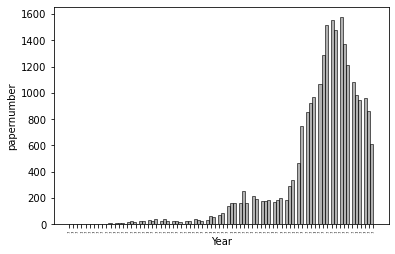

In [13]:
plt.hist(thesis_df['Year'], bins = 100, facecolor='gray', edgecolor='black', alpha = 0.6)
plt.xlabel('Year')
plt.ylabel('papernumber')
plt.xticks(fontsize=0.2, fontweight='bold')
plt.show()

In [14]:
import seaborn as sns

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

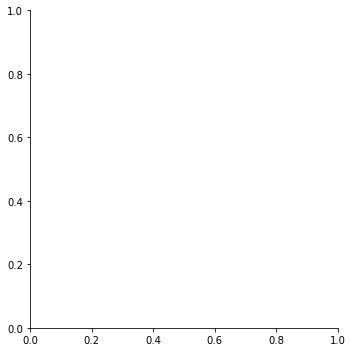

In [19]:
sns.displot(thesis_df, x="Author", kind="kde", bw_adjust=5)

In [ ]:
sns.kdeplot(data=thesis_df,x='Year',bw_adjust=5)

In [ ]:
plt.hist(thesis_df['Author'], bins = 1000, facecolor='gray', edgecolor='black')
plt.show()

In [36]:

department = "https://d-scholarship.pitt.edu/view/divisions/divisions/"
department_r = requests.get(department)
department_source = department_r.content
department_soup = BeautifulSoup(department_source, 'html.parser')

department_class = department_soup.find(class_="ep_toolbox_content").find_all("a")



department_yearly_list=['https://d-scholarship.pitt.edu/view/divisions/sch=5Fcba/', 
                            'https://d-scholarship.pitt.edu/view/divisions/sch=5Fcgs/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fuhc/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fas/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Ffas/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fgspia/',  
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fbus/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fcompinfo/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fdm/', 
                                'https://d-scholarship.pitt.edu/view/divisions/sch=5Fedu/']
for dep in department_class:
    department_element = dep.text
    department_split_result = [x.strip('..') for x in department_element.split("\n")]
    department_yearly_list.append(dep['href'])
    url_department = f"https://d-scholarship.pitt.edu/view/divisions/{dep['href']}.html"
    department_yearly_list.append( url_department)    
    
    



department_school = []
for d in department_class:
        dp = d.text
        department_school .append(dp)
    




In [27]:
import pandas as pd
 
df_school = pd.read_excel("schoolnumber.xlsx")
print(df_school)

                                          school_name  paper_number
0                  College of Business Administration            45
1                          College of General Studies             3
2                   David C. Frederick Honors College           442
3                Dietrich School of Arts and Sciences          6884
4                        Faculty of Arts and Sciences            28
5   Graduate School of Public and International Af...           166
6          Joseph M. Katz Graduate School of Business           247
7                 School of Computing and Information           251
8                           School of Dental Medicine           365
9                                 School of Education          1148
10       School of Health and Rehabilitation Sciences          1076
11                     School of Information Sciences          1396
12                                      School of Law           200
13                                  School of Nu

In [28]:
df_school['rank'] = df_school['paper_number'].rank(ascending=False)
df_school


,school_name,paper_number,rank
0,College of Business Administration,45,18.0
1,College of General Studies,3,23.0
2,David C. Frederick Honors College,442,8.0
3,Dietrich School of Arts and Sciences,6884,1.0
4,Faculty of Arts and Sciences,28,19.0
5,Graduate School of Public and International Af...,166,16.0
6,Joseph M. Katz Graduate School of Business,247,14.0
7,School of Computing and Information,251,12.0
8,School of Dental Medicine,365,10.0
9,School of Education,1148,6.0


In [38]:
df_school['paper_number'] = 1 
df_school.head(30)


,school_name,paper_number,rank
0,College of Business Administration,1,18.0
1,College of General Studies,1,23.0
2,David C. Frederick Honors College,1,8.0
3,Dietrich School of Arts and Sciences,1,1.0
4,Faculty of Arts and Sciences,1,19.0
5,Graduate School of Public and International Af...,1,16.0
6,Joseph M. Katz Graduate School of Business,1,14.0
7,School of Computing and Information,1,12.0
8,School of Dental Medicine,1,10.0
9,School of Education,1,6.0
